## Model Training 

**Author: J. Hickman**
* This notebook vectorizes the corpus

* Partitions data into training and test 
* Then trains the following models
  * Multi-nomial Naive Bayes classifier 
  * KNN classifier
    * (with a hyper-parameter tuning demonstrating)
  * KNN regression  
    * (with a hyper-parameter tuning demonstrating)

### About the data: 

* X strings from wikipedia articles about different topics (need to be vectorized first)
  
* y1 = CATEGORICAL topics  (0,1,2) (pizza, metallurgy, basketball)  --> Classification targets 
* y2 = NUMERIC CONTINUOUS (sentiment score -1 to 1)  --> Regression targets

### Overview

* **Classification**
  * **Multinomial Naive Bayes (MultinomialNB).** 
    * The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). 
    * The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.
    * https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
  * **Gaussian Naive Bayes (GaussianNB).** 
    * Gaussian Naive Bayes supports continuous valued features and models each as conforming to a Gaussian (normal) distribution. 
    * An approach to create a simple model is to assume that the data is described by a Gaussian distribution with no co-variance (independent dimensions) between dimensions.
    * https://iq.opengenus.org/gaussian-naive-bayes/
  * **KNN** 
    * Classifier implementing the k-nearest neighbors vote.
* **Regression**
  * **KNN**
    * Regression based on k-nearest neighbors.
    * The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.


### Import

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics import accuracy_score


### Read and re-format

In [19]:
#RELOAD FILE AND PRETEND THAT IS OUR STARTING POINT 
df=pd.read_csv('wiki-crawl-results.csv')  
print(df.shape)

#CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; #y1=[]; y2=[]
y1=[]
for label in df["label"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y1.append(i)
y1=np.array(y1)

# CONVERT DF TO LIST OF STRINGS 
corpus=df["text"].to_list()
y2=df["sentiment"].to_numpy()

print("number of text chunks = ",len(corpus))
print(corpus[0:3])


(5693, 3)
index = 0 : label = pizza
index = 1 : label = metallurgy
index = 2 : label = basketball
number of text chunks =  5693
['word first appeared latin text town gaeta still part byzantine empire 997 ad text state tenant certain property give bishop gaeta duodecim pizze twelve every christmas day another twelve every easter sunday suggested etymology include byzantine greek late latin pitta cf', 'modern greek pitta bread apulia calabrian byzantine italy pitta round flat bread baked oven high temperature sometimes topping', 'word pitta turn traced either ancient greek pikte fermented pastry latin became picta ancient greek pissa attic pitta pitch tea bran bran bread']


### Vectorize the text data

In [20]:

# INITIALIZE COUNT VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
vectorizer=CountVectorizer(min_df=0.001)   

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())

#CONVERT TO ONE-HOT VECTORS
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)

# DOUBLE CHECK 
print(X.shape,y1.shape,y2.shape)
print("DATA POINT-0:",X[0,0:10],"y1 =",y1[0],"  y2 =",y2[0])

(5693, 12813) (5693,) (5693,)
DATA POINT-0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] y1 = 0   y2 = 0.2732


### Partition Data

**Assignment 3.2.4: Break data into an 80-20 training/test set** 

As a sanity check, reprint the shapes to make sure everything is correct

```
x_train.shape		: (120, 4)
y_train.shape		: (120,)
X_test.shape		: (30, 4)
y_test.shape		: (30,)
```

In [21]:
# BEFORE SPLIT
print(y1[1000:1200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [22]:
# INSERT CODE TO PARTITION DATASET INTO TRAINING-TEST

from sklearn.model_selection import train_test_split
test_ratio=0.2

# SPLIT ARRAYS OR MATRICES INTO RANDOM TRAIN AND TEST SUBSETS.
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape		:",x_train.shape)
print("y_train.shape		:",y_train.shape)

print("X_test.shape		:",x_test.shape)
print("y_test.shape		:",y_test.shape)

x_train.shape		: (4554, 12813)
y_train.shape		: (4554,)
X_test.shape		: (1139, 12813)
y_test.shape		: (1139,)


In [23]:
#CHECK TO MAKE SURE IT WAS RANDOMIZED 
print(y_train[0:100])

[2 1 1 1 2 2 0 2 2 2 2 2 1 0 1 2 2 1 0 2 2 0 1 1 0 1 1 2 1 0 2 1 2 1 2 2 1
 1 2 1 1 2 0 0 2 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 2 1 1 0
 1 2 1 1 0 1 0 0 2 2 1 1 1 1 1 1 2 2 1 1 0 2 1 1 0 1]


### Utility function

* Write a function to report accuracy
* Note this will act on object stored in pythons global scope. Therefore as long as everything is named the same you can recycle it for multiple models

In [ ]:

def report(y,ypred):
      #ACCURACY COMPUTE 
      print("Accuracy:",accuracy_score(y, ypred)*100)
      print("Number of mislabeled points out of a total %d points = %d"
            % (y.shape[0], (y != ypred).sum()))

def print_model_summary():
      # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
      yp_train = model.predict(x_train)
      yp_test = model.predict(x_test)

      print("ACCURACY CALCULATION\n")

      print("TRAINING SET:")
      report(y_train,yp_train)

      print("\nTEST SET (UNTRAINED DATA):")
      report(y_test,yp_test)

      print("\nCHECK FIRST 20 PREDICTIONS")
      print("TRAINING SET:")
      print(y_train[0:20])
      print(yp_train[0:20])
      print("ERRORS:",yp_train[0:20]-y_train[0:20])

      print("\nTEST SET (UNTRAINED DATA):")
      print(y_test[0:20])
      print(yp_test[0:20])
      print("ERRORS:",yp_test[0:20]-y_test[0:20])

## Classification model-1: Multinomial Naive Bayes  

The following code applies the multi-nomial Naive Bayes classifier to the text data-set generated with wikipeda

### Train model 

* Use SkLearn to train a MultinomialNB model 
*  When the model is trained, insert code to output the following information about the training and test set (your numbers will vary)
   * **Remember that the test set was NOT seen during the training process, and therefore "test" predictions show how the model does on new "unseen" data**
  


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# INITIALIZE MODEL 
model = MultinomialNB()

# TRAIN MODEL 
model.fit(x_train,y_train)

# PRINT REPORT USING UTILITY FUNCTION ABOVE
print_model_summary()

ACCURACY CALCULATION

TRAINING SET:
Accuracy: 97.76021080368906
Number of mislabeled points out of a total 4554 points = 102

TEST SET (UNTRAINED DATA):
Accuracy: 93.32748024582968
Number of mislabeled points out of a total 1139 points = 76

CHECK FIRST 20 PREDICTIONS
TRAINING SET:
[2 1 1 1 2 2 0 2 2 2 2 2 1 0 1 2 2 1 0 2]
[2 1 1 1 2 2 0 2 2 2 2 2 1 0 1 2 2 1 0 2]
ERRORS: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

TEST SET (UNTRAINED DATA):
[1 0 2 2 1 1 1 2 0 1 1 1 0 1 1 1 1 1 2 2]
[1 0 2 2 1 1 1 2 0 1 2 1 0 1 1 1 1 1 2 2]
ERRORS: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


## Classification model-2: KNN 

#### Hyper-Parameter tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# HYPER PARAMETER SEARCH FOR OPTIMAL NUMBER OF NEIGHBORS 
num_neighbors=[]
train_accuracy=[]
test_accuracy=[]

# LOOP OVER HYPER-PARAM
for i in range(1,40):
    # INITIALIZE MODEL 
    model = KNeighborsClassifier(n_neighbors=i)

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    print("n_neighbors =",i)
    acc1=accuracy_score(y_train, yp_train)*100
    acc2=accuracy_score(y_test, yp_test)*100

    num_neighbors.append(i)
    train_accuracy.append(acc1)
    test_accuracy.append(acc2)

    print(" train accuracy:",acc1)
    print(" test accuracy:" ,acc2)

n_neighbors = 1
 train accuracy: 100.0
 test accuracy: 64.35469710272169
n_neighbors = 2
 train accuracy: 95.14712340799298
 test accuracy: 64.96927129060579
n_neighbors = 3
 train accuracy: 71.32191480017566
 test accuracy: 51.79982440737489
n_neighbors = 4
 train accuracy: 70.02635046113306
 test accuracy: 52.589991220368745
n_neighbors = 5
 train accuracy: 54.896794027228815
 test accuracy: 44.95171202809482
n_neighbors = 6
 train accuracy: 67.3473869126043
 test accuracy: 55.04828797190518
n_neighbors = 7
 train accuracy: 77.4483970136144
 test accuracy: 67.25197541703248
n_neighbors = 8
 train accuracy: 83.94817742643829
 test accuracy: 70.7638279192274
n_neighbors = 9
 train accuracy: 83.50900307422047
 test accuracy: 71.11501316944688
n_neighbors = 10
 train accuracy: 86.58322353974528
 test accuracy: 74.53906935908692
n_neighbors = 11
 train accuracy: 83.35529205094423
 test accuracy: 74.36347673397718
n_neighbors = 12
 train accuracy: 83.97013614404919
 test accuracy: 73.13432

### Convergence plot

Text(0, 0.5, 'Training (black) and test (blue) accuracy')

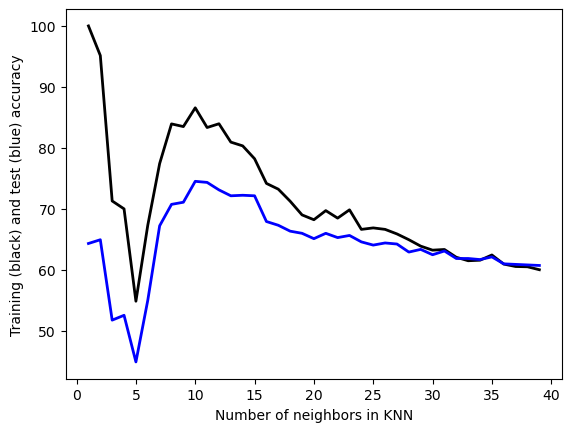

In [ ]:
plt.plot(num_neighbors,train_accuracy ,linewidth=2, color='k')
plt.plot(num_neighbors,test_accuracy ,linewidth=2, color='b')

plt.xlabel("Number of neighbors in KNN")
plt.ylabel("Training (black) and test (blue) accuracy")

#### Re-train with optimal parameters

In [ ]:
# RETRAIN WITH OPTIMAL HYPER-PARAMETERS

# INITIALIZE MODEL 
model = KNeighborsClassifier(n_neighbors=30)

# TRAIN MODEL 
model.fit(x_train,y_train)

# PRINT REPORT USING UTILITY FUNCTION ABOVE
print_model_summary()

ACCURACY CALCULATION

TRAINING SET:
Accuracy: 63.26306543697848
Number of mislabeled points out of a total 4554 points = 1673

TEST SET (UNTRAINED DATA):
Accuracy: 62.510974539069366
Number of mislabeled points out of a total 1139 points = 427

CHECK FIRST 20 PREDICTIONS
TRAINING SET:
[2 1 1 1 2 2 0 2 2 2 2 2 1 0 1 2 2 1 0 2]
[1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]
ERRORS: [-1  0  0  0  0 -1  1 -1 -1 -1  0 -1  0  1  0 -1 -1  0  1 -1]

TEST SET (UNTRAINED DATA):
[1 0 2 2 1 1 1 2 0 1 1 1 0 1 1 1 1 1 2 2]
[1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
ERRORS: [ 0  1  0  0  0  0  0 -1  1  0  0  0  1  0  0  0  0  0 -1 -1]


## Regression model-1: KNN 

* fit y2 (sentiment score from -1 to 1) instead of y1 (classes) 

### Re-partition data

In [ ]:

from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y2, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape		:",x_train.shape)
print("y_train.shape		:",y_train.shape)

print("X_test.shape		:",x_test.shape)
print("y_test.shape		:",y_test.shape)

x_train.shape		: (4554, 12813)
y_train.shape		: (4554,)
X_test.shape		: (1139, 12813)
y_test.shape		: (1139,)


#### Hyper-Parameter tuning

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

# HYPER PARAMETER SEARCH FOR OPTIMAL NUMBER OF NEIGHBORS 
num_neighbors_2=[]
train_error=[]
test_error=[]

# LOOP OVER HYPER-PARAM
for i in range(1,33):
    # INITIALIZE MODEL 
    model = KNeighborsRegressor(n_neighbors=i)

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    print("n_neighbors =",i)
    # shift=1+np.min(y_train) #add shift to remove division by zero 
    err1=mean_absolute_error(y_train, yp_train) 
    err2=mean_absolute_error(y_test, yp_test) 

    num_neighbors_2.append(i)
    train_error.append(err1)
    test_error.append(err2)

    print(" train MAE:",err1)
    print(" test MAE:" ,err2)

n_neighbors = 1
 train MAE: 5.6653491436100135e-06
 test MAE: 0.31909543459174716
n_neighbors = 2
 train MAE: 0.1622590689503733
 test MAE: 0.30970697980684814
n_neighbors = 3
 train MAE: 0.20266238471673254
 test MAE: 0.2984139596136962
n_neighbors = 4
 train MAE: 0.22210323342116822
 test MAE: 0.2947245829675153
n_neighbors = 5
 train MAE: 0.23439634606938953
 test MAE: 0.29549715539947324
n_neighbors = 6
 train MAE: 0.2429700300102474
 test MAE: 0.29384625402399767
n_neighbors = 7
 train MAE: 0.24384770060857017
 test MAE: 0.28799697729838203
n_neighbors = 8
 train MAE: 0.23772277667984187
 test MAE: 0.2782567603160667
n_neighbors = 9
 train MAE: 0.2441465744400527
 test MAE: 0.28001013559652715
n_neighbors = 10
 train MAE: 0.24747160957400086
 test MAE: 0.2812890781387182
n_neighbors = 11
 train MAE: 0.24641456861101127
 test MAE: 0.2783851783861441
n_neighbors = 12
 train MAE: 0.2403726321182843
 test MAE: 0.27211726660813573
n_neighbors = 13
 train MAE: 0.242167489274011
 test MA

### Convergence plot

Text(0, 0.5, 'Training (black) and test (blue) MAE (error)')

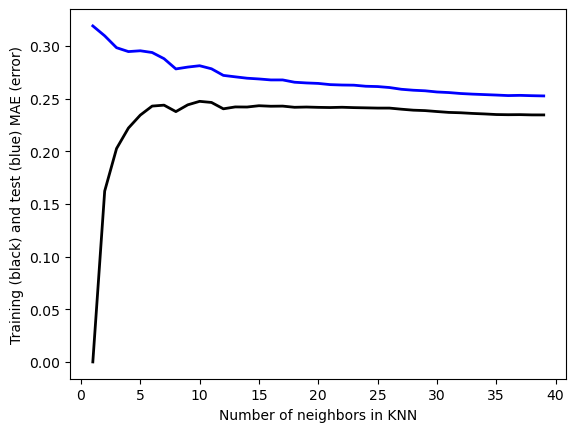

In [ ]:
plt.plot(num_neighbors_2,train_error ,linewidth=2, color='k')
plt.plot(num_neighbors_2,test_error ,linewidth=2, color='b')

plt.xlabel("Number of neighbors in KNN")
plt.ylabel("Training (black) and test (blue) MAE (error)")

#### Re-train with optimal parameters

In [ ]:
# INITIALIZE MODEL 
model = KNeighborsRegressor(n_neighbors=35)

# TRAIN MODEL 
model.fit(x_train,y_train)

# OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

### Parity Plot

* Plotting y_pred vs y_data lets you see how good the fit is

* The closer to the line y=x the better the fit (ypred=ydata --> prefect fit)

Text(0, 0.5, 'y_pred (blue=test)(black=Train)')

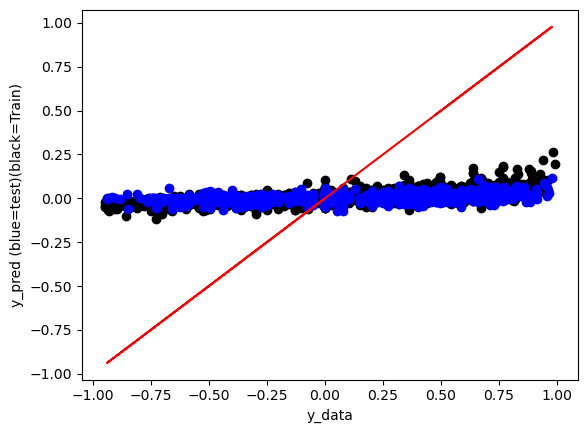

In [ ]:
plt.plot(y_train,yp_train ,"o", color='k')
plt.plot(y_test,yp_test ,"o", color='b')
plt.plot(y_test,y_test ,"-", color='r')

plt.xlabel("y_data")
plt.ylabel("y_pred (blue=test)(black=Train)")

In [ ]:
# # RUN CLASSIFICATION REPORT FOR TRAINING SET
# from sklearn.metrics import classification_report
# print("Classification Report \n {}".format(classification_report(y_train, yp_train, labels=range(0,10))))